# Explortatory Data Analysis

___

 ## Packages

In [5]:
import matplotlib.pyplot as plt
import pyarrow.parquet   as pq
import numpy as np
import seaborn as sns  
import pandas as pd

## Read in Data

In [17]:
df = pq.read_table('../data/cmp/curated/meter-usage').to_pandas()


## Display General Information

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500280 entries, 0 to 500279
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   service_point_id       500280 non-null  int64   
 1   meter_id               500280 non-null  object  
 2   interval_end_datetime  500280 non-null  object  
 3   meter_channel          500280 non-null  int64   
 4   kwh                    500280 non-null  float64 
 5   account_number         500280 non-null  category
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 19.6+ MB


In [33]:
df.head()


,service_point_id,meter_id,interval_end_datetime,meter_channel,kwh,account_number,year
0,2300822246,L108605388,2022-10-01 00:00:00,10,0.594,30010320353,2022
1,2300822246,L108605388,2022-10-01 00:15:00,10,0.101,30010320353,2022
2,2300822246,L108605388,2022-10-01 00:30:00,10,0.104,30010320353,2022
3,2300822246,L108605388,2022-10-01 00:45:00,10,0.106,30010320353,2022
4,2300822246,L108605388,2022-10-01 01:00:00,10,0.099,30010320353,2022


In [29]:
df['interval_end_datetime'] = pd.to_datetime(df['interval_end_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['year'] = df['interval_end_datetime'].dt.year

df_fil = df.groupby(df['interval_end_datetime'].dt.floor('d'))['kwh'].max().to_frame().rename(columns = {'kwh':'max_kwh'}).reset_index()

df_fil



,interval_end_datetime,max_kwh
0,2020-10-08,8.329
1,2020-10-09,4.966
2,2020-10-10,4.180
3,2020-10-11,3.514
4,2020-10-12,8.618
...,...,...
1083,2023-09-26,5.015
1084,2023-09-27,4.887
1085,2023-09-28,5.843
1086,2023-09-29,7.646


<Axes: xlabel='interval_end_datetime', ylabel='max_kwh'>

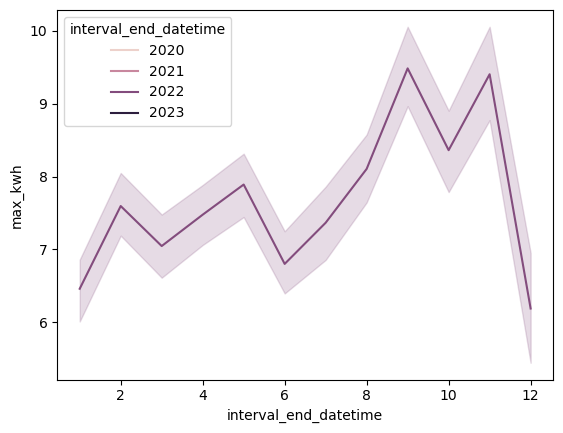

In [31]:
sns.lineplot(data = df_fil, x = df.interval_end_datetime.dt.day, y = 'max_kwh', hue = df.interval_end_datetime.dt.year)

In [ ]:
df.